In [64]:
from langgraph.graph import StateGraph,START, END
from dotenv import load_dotenv
from typing import TypedDict
# from langchain_google_genai import ChatGoogleGenerativeAI

In [65]:
load_dotenv()

True

In [66]:
# model = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [67]:
# define state

class BatsmanState(TypedDict):

    runs : int
    balls : int
    fours : int
    sixes : int

    sr : float
    bpb : float
    bp : float
    summary : str

In [75]:
def strike_rate(state:BatsmanState):

    sr = (state['runs']/state['balls'])*100

    return {"sr":sr}

def boundary_percent(state:BatsmanState):
    
    bp = (( state['fours']*4 ) + (state['sixes']*6 ))/state['runs']

    return {"bp":bp}

def ball_per_boundary(state: BatsmanState):

    bpb = state['balls']/(state['fours']+state['sixes'])

    return {"bpb":bpb}

def summary(state:BatsmanState):
    summary = f"""
strike Rate - {state['sr']} \n
boundary_percent - {state['bp']} \n
ball_per_boundary - {state['bpb']}"""
    
    state["summary"] = summary

    return state


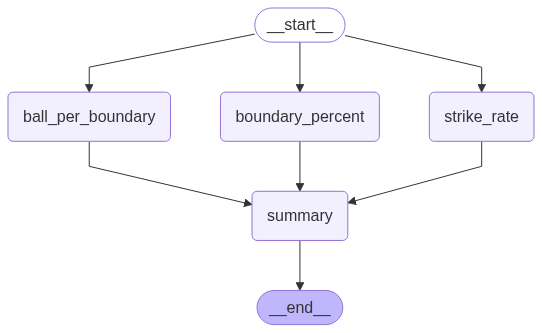

In [76]:
# build state 
graph = StateGraph(BatsmanState)

# build nodes
graph.add_node("strike_rate",strike_rate)
graph.add_node("ball_per_boundary",ball_per_boundary)
graph.add_node("boundary_percent",boundary_percent)
graph.add_node("summary",summary)

# build edges
graph.add_edge(START,"strike_rate")
graph.add_edge(START,"ball_per_boundary")
graph.add_edge(START,"boundary_percent")
graph.add_edge("strike_rate","summary")
graph.add_edge("ball_per_boundary","summary")
graph.add_edge("boundary_percent",'summary')
graph.add_edge("summary",END)

# compile
workflow = graph.compile()
graph.compile()

In [77]:
# execute

initial_state = {"runs": 100 , "balls": 50 , "fours":  6, "sixes":4 }
final_state = workflow.invoke(initial_state)

print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 200.0, 'bpb': 5.0, 'bp': 0.48, 'summary': '\nstrike Rate - 200.0 \n\nboundary_percent - 0.48 \n\nball_per_boundary - 5.0'}


: 